# Sử dụng Random Forest trong Python

- Quản Thành Thơ, Nguyễn Hữu Vũ 
- Nhóm nghiên cứu về AI đại học Bách Khoa Tp. Hồ Chí Minh

In [1]:
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_filename = "bill_authentication.csv"

In [3]:

dataset = pd.read_csv(dataset_filename)

## 1) Phân tích dữ liệu

In [4]:
dataset.shape

(1372, 5)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
dataset.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
# Overview about dataset
dataset.keys()

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [8]:
dataset.head()  

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Visualization: Xác định quan hệ giữa các biến dữ liệu

**Sử dụng pairplot**

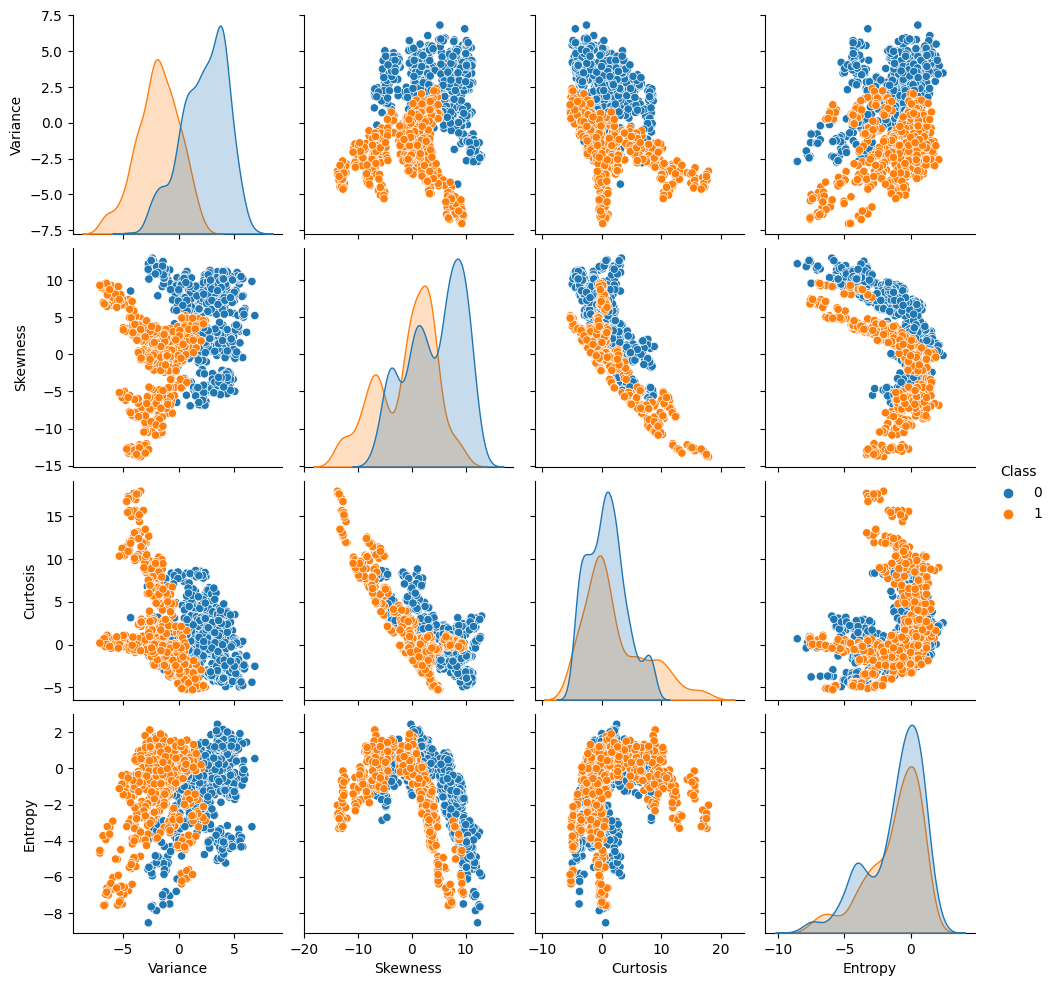

In [9]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(dataset, hue = 'Class', kind='scatter')
plt.show()

Nhìn vào 2 biểu đồ trên ta thấy 

**Sử dụng correlation table và heatmap**

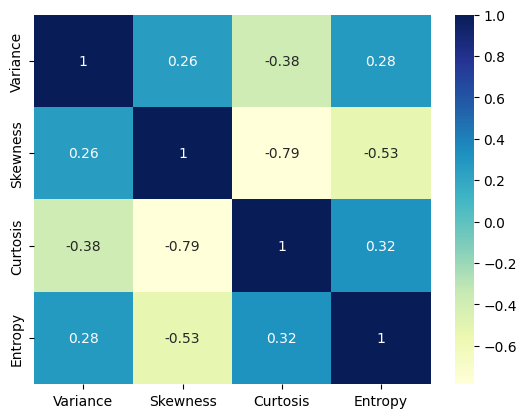

In [10]:
# Let's see the correlation between different variables.
sns.heatmap(dataset.drop('Class', axis = 1). corr(), cmap="YlGnBu", annot = True)
plt.show()

Nhìn vào 2 biểu đồ trên ta thấy `Curtosis` and `Skewness` có độ tương quan cao

### 2) Chuẩn bị training data và test data

##### Xác định `features` và `labels`

Trong dataset này, label của dữ liệu chính là giá trị trong cột **Class**

In [11]:
X = dataset.drop('Class', axis=1)  
y = dataset['Class']  

Chúng ta chia dataset thành 2 tập: training set and test set theo tỉ lện 80/20

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, y_train.size)
print(X_test.shape, y_test.shape)

(1097, 4) 1097
(275, 4) (275,)


## 3) Xây dựng mô hình phân lớp  Random Forest

Chúng ta sẽ sử dụng  `RandomForestClassifier` của sklearn để xây dựng mô hình phân lớp Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier in which  number of trees is 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)


In [14]:
# fit data to the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### Xem xét kết quả trả về của mô hình

In [15]:
# Số class của random forest classifier
clf.n_classes_ 

2

In [16]:
# Labels của classifier
clf.classes_ 

array([0, 1])

In [18]:
# Tổng số features đã được sử dụng để xây dựng classifier
clf.n_features_in_ 

4

### Prediction:

In [19]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

### Model Evaluation

In [20]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[159   1]
 [  2 113]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       160
           1       0.99      0.98      0.99       115

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [21]:
y_test.values.shape

(275,)

In [22]:
y_pred.shape

(275,)

##### Tình accuracy bằng `accuracy_score`

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.values, y_pred)

0.9890909090909091

##### Sử dụng model để tính accuracy

In [24]:
# accuracy của model on testing set
accuracy_score = clf.score(X_test, y_test)
print(f"Random Forest classifier accuracy score for training set is {accuracy_score}")

Random Forest classifier accuracy score for training set is 0.9890909090909091


### Feature Importance

In [25]:
# Độ quan trọng của mỗi feature theo thứ tự
clf.feature_importances_

array([0.53089505, 0.241354  , 0.16726731, 0.06048364])

In [26]:
#Tạo Series object để thấy feature nào quan trọng
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Variance    0.530895
Skewness    0.241354
Curtosis    0.167267
Entropy     0.060484
dtype: float64

##### Visualize the feature importance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


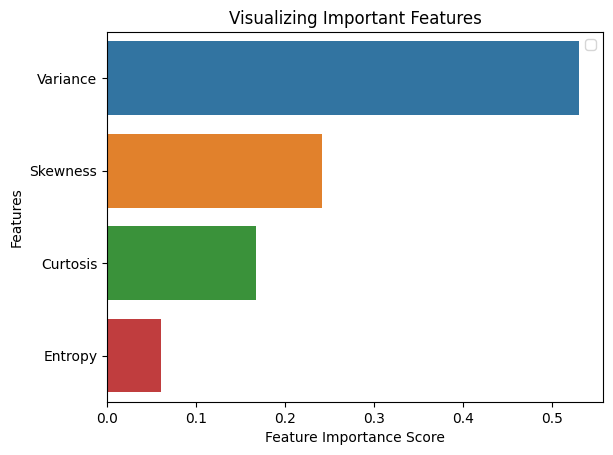

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Như vậy có thể thấy `Variance` là thuộc tính quan trọng nhất. Đồng thời, ta có thể thấy độ quan trọng của thuộc tính `Entropy` rất thấp, do đó ta có thể bỏ nó và chỉ sử dụng 3 features còn lại để xây dựng classifier

## 4) Xây dựng model dựa trên Selected Features

In [28]:
X_train

,Variance,Skewness,Curtosis,Entropy
695,0.49571,10.2243,-1.09700,-4.01590
322,-1.73440,2.0175,7.76180,0.93532
1165,-3.80530,2.4273,0.68090,-1.08710
1274,-2.55260,-7.3625,6.92550,-0.66811
1111,-6.36790,8.0102,0.42470,-3.22070
...,...,...,...,...
383,3.81170,10.1457,-4.04630,-4.56290
987,-0.55648,3.2136,-3.30850,-2.79650
1000,-2.88290,3.8964,-0.18880,-1.16720
52,3.14520,5.8250,-0.51439,-1.49440


In [29]:
# bỏ cột 'Entropy', chỉ chọn 3 cột còn lại
X_train_selected = X_train.drop('Entropy', axis = 1)
X_test_selected = X_test.drop('Entropy', axis = 1)

In [30]:
X_train_selected

,Variance,Skewness,Curtosis
695,0.49571,10.2243,-1.09700
322,-1.73440,2.0175,7.76180
1165,-3.80530,2.4273,0.68090
1274,-2.55260,-7.3625,6.92550
1111,-6.36790,8.0102,0.42470
...,...,...,...
383,3.81170,10.1457,-4.04630
987,-0.55648,3.2136,-3.30850
1000,-2.88290,3.8964,-0.18880
52,3.14520,5.8250,-0.51439


In [31]:
# Xây dựng classifer dựa trên X_train_selected (chỉ có 3 features)
clf2 = RandomForestClassifier(n_estimators=100, random_state=0)
clf2.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=0)

### Model Evaluation

In [32]:
# accuracy của model
accuracy_score = clf2.score(X_test_selected, y_test)
print(f"Random Forest classifier accuracy score is {accuracy_score}")

Random Forest classifier accuracy score is 0.9854545454545455


Có thể thấy sau khi loại bỏ thuộc tính `Entropy`, độ chính xác của model vẫn không thay đổi nhiều. Điều này được giải thích là do thuộc tính `Entropy` không quan trọng, nên ta có thể loại bỏ nó khi xây dựng model.